In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
solar_data = pd.read_csv('un_solar_data.csv')
solar_data.head()

,Country or Area,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes
0,Afghanistan,Electricity - total solar production,2022.0,"Kilowatt-hours, million",64.00,1.0
1,Afghanistan,Electricity - total solar production,2021.0,"Kilowatt-hours, million",64.00,1.0
2,Afghanistan,Electricity - total solar production,2020.0,"Kilowatt-hours, million",65.93,NaN
3,Afghanistan,Electricity - total solar production,2019.0,"Kilowatt-hours, million",54.77,NaN
4,Afghanistan,Electricity - total solar production,2018.0,"Kilowatt-hours, million",35.00,NaN


# Appendix A1

In [10]:
# Filter the dataset for the last 5 years (2018-2022) and focus on total solar production
solar_data_recent = solar_data[(solar_data["Year"] >= 2018) & (solar_data["Year"] <= 2022)]

# Group by country and sum the quantities for each year to get the total production over the period
total_solar_production_by_country = solar_data_recent.groupby("Country or Area")["Quantity"].sum()

# Sort countries by their total solar energy production in descending order
total_solar_production_sorted = total_solar_production_by_country.sort_values(ascending=False).reset_index()

# Rename the columns for clarity
total_solar_production_sorted.columns = ['Country or Area', 'Total Production']

# Display the top countries with the highest aggregated solar energy production
total_solar_production_sorted.head(10)


,Country or Area,Total Production
0,China,988594.000
1,United States,453314.824
2,Japan,297229.978
3,India,227148.000
4,Germany,186678.000
5,Italy,96323.232
6,Spain,75612.000
7,Australia,73528.247
8,"Korea, Republic of",63566.251
9,France,52445.664


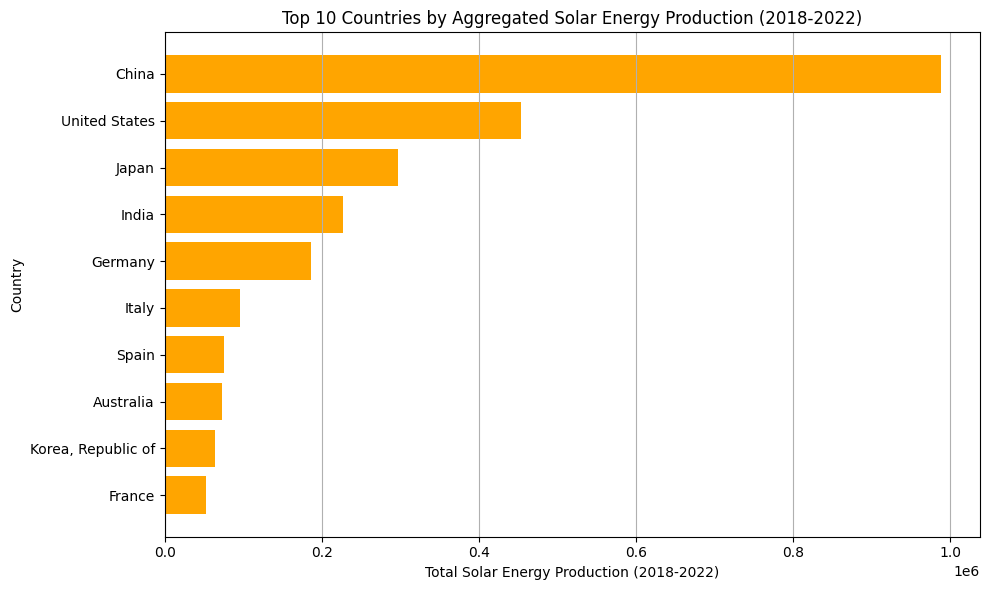

In [24]:
top_countries_solar = total_solar_production_sorted.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_countries_solar['Country or Area'][::-1], top_countries_solar['Total Production'][::-1], color='orange')
plt.xlabel('Total Solar Energy Production (2018-2022)')
plt.ylabel('Country')
plt.title('Top 10 Countries by Aggregated Solar Energy Production (2018-2022)')
plt.tight_layout()
plt.grid(axis='x')
plt.show()

In [27]:

# Filter the dataset for the last 5 years (2018-2022)
solar_data_recent = solar_data[(solar_data["Year"] >= 2018) & (solar_data["Year"] <= 2022)]

# Calculate annual production by country
annual_production = solar_data_recent.groupby(["Country or Area", "Year"])["Quantity"].sum().unstack()

# Calculate initial and final production values
initial_production = annual_production[2018]
final_production = annual_production[2022]

# Number of years for the period
n_years = 2022 - 2018

# Calculate CAGR for each country
cagr = ((final_production / initial_production) ** (1 / n_years)) - 1

# Convert CAGR to percentage
cagr_percentage = cagr * 100

# Sort the CAGR values in descending order to find the top 10 countries with the highest CAGR
top_10_cagr = cagr_percentage.sort_values(ascending=False).head(10)

print(top_10_cagr)


Country or Area
Zambia                    222.680332
Eswatini                  175.604890
Latvia                    138.625747
Argentina                 128.184862
Republic of Moldova       105.016424
Myanmar                    92.696964
China, Macao SAR           77.827941
Oman                       71.208599
Dem. Rep. of the Congo     69.533856
Somalia                    60.601852
dtype: float64


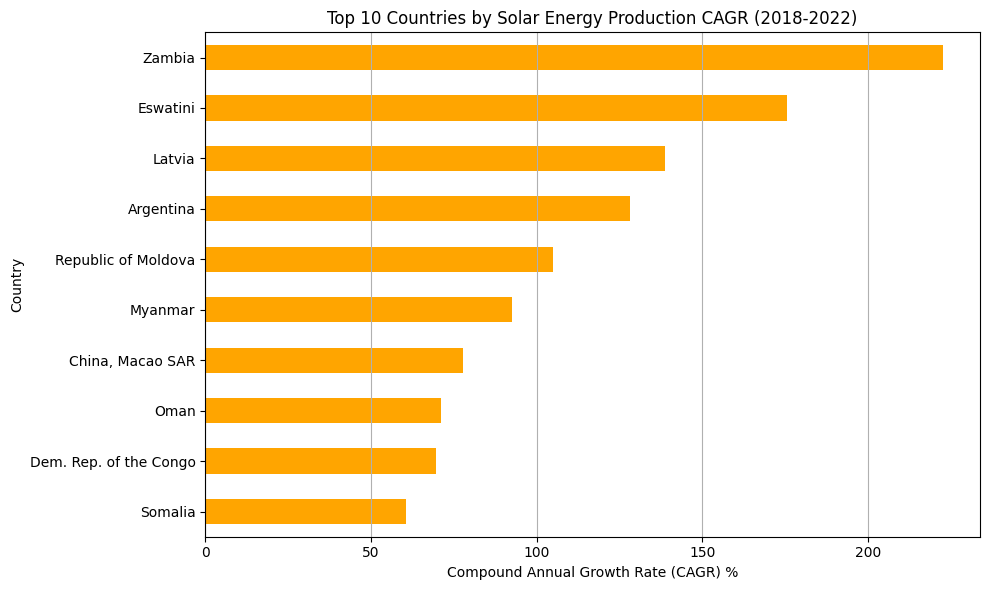

In [40]:
plt.figure(figsize=(10, 6))
top_10_cagr.sort_values().plot(kind='barh', color='orange')
plt.xlabel('Compound Annual Growth Rate (CAGR) %')
plt.ylabel('Country')
plt.title('Top 10 Countries by Solar Energy Production CAGR (2018-2022)')
plt.tight_layout()
plt.grid(axis='x')
plt.show()


In [3]:
wind_data = pd.read_csv('wind_data.csv')
wind_data.head()

,Country or Area,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes
0,Algeria,Electricity - total wind production,2021.0,"Kilowatt-hours, million",11.0,NaN
1,Algeria,Electricity - total wind production,2020.0,"Kilowatt-hours, million",8.0,NaN
2,Algeria,Electricity - total wind production,2019.0,"Kilowatt-hours, million",10.0,NaN
3,Algeria,Electricity - total wind production,2018.0,"Kilowatt-hours, million",10.0,NaN
4,Argentina,Electricity - total wind production,2022.0,"Kilowatt-hours, million",14164.0,NaN


In [6]:
# Filter the wind dataset for the last 5 years (2018-2022)
wind_data_recent = wind_data[(wind_data["Year"] >= 2018) & (wind_data["Year"] <= 2022)]

# Group by country and year, and then calculate the total production for each year
yearly_production_by_country = wind_data_recent.groupby(["Country or Area", "Year"])["Quantity"].sum().unstack()

# Calculate the year-on-year growth for each country
year_on_year_growth = yearly_production_by_country.diff(axis=1)

# Sum the annual growths to get the total growth over the period for each country
total_growth_by_country = year_on_year_growth.sum(axis=1)

# Sort countries by their total growth in wind energy production
total_growth_sorted = total_growth_by_country.sort_values(ascending=False).reset_index()


total_growth_sorted.columns = ['Country or Area', 'Total Growth']

# Display the top countries with the highest total growth in wind energy production
total_growth_sorted.head(10)


,Country or Area,Total Growth
0,China,290129.000
1,United States,106979.529
2,Brazil,23810.975
3,India,12846.000
4,Argentina,12751.000
5,Türkiye,11487.544
6,Spain,11165.000
7,Sweden,10621.000
8,Australia,9371.369
9,France,8232.757


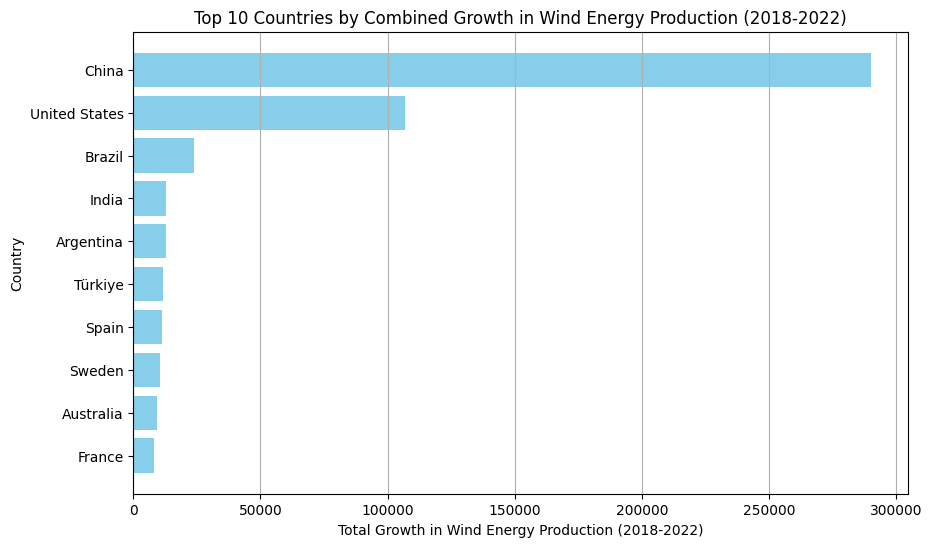

In [26]:
top_countries = total_growth_sorted.head(10)

# Creating a horizontal bar chart to represent the total growth in wind energy production
plt.figure(figsize=(10, 6))
plt.barh(top_countries['Country or Area'], top_countries['Total Growth'], color='skyblue')
plt.xlabel('Total Growth in Wind Energy Production (2018-2022)')
plt.ylabel('Country')
plt.title('Top 10 Countries by Combined Growth in Wind Energy Production (2018-2022)')
plt.gca().invert_yaxis()  # To display the country with the highest growth at the top
plt.grid(axis='x')
plt.show()

In [32]:
# Assuming 'wind_data_recent' and 'yearly_production_by_country' are defined as before

# Calculate initial and final production values for each country
initial_production = yearly_production_by_country[2018]
final_production = yearly_production_by_country[2022]

# Calculate the CAGR for each country
cagr = ((final_production / initial_production) ** (1 / 4)) - 1

# Convert CAGR to percentage
cagr_percentage = cagr * 100

# Sort the CAGR values in descending order and select the top 10 countries
top_10_countries_by_cagr = cagr_percentage.sort_values(ascending=False).head(10)

print(top_10_countries_by_cagr)


Country or Area
Tonga                     230.661222
Argentina                  77.934818
Republic of Moldova        57.072462
Kazakhstan                 50.645538
Jordan                     25.398669
Montenegro                 23.187260
Dominica                   20.632241
British Virgin Islands     16.737753
Thailand                   16.155971
Latvia                     11.729834
dtype: float64


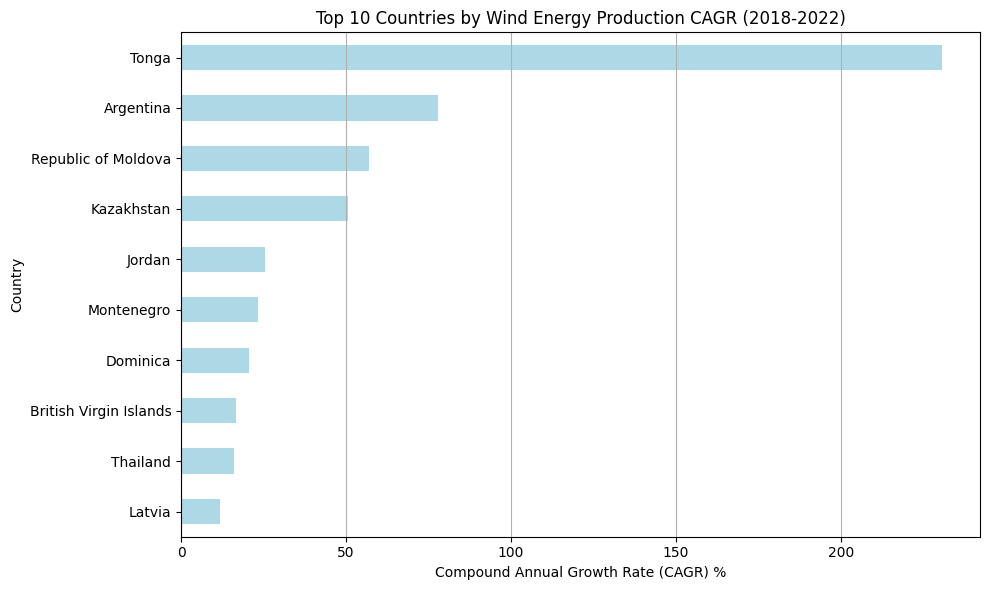

In [35]:
plt.figure(figsize=(10, 6))
top_10_countries_by_cagr.sort_values().plot(kind='barh', color='lightblue')
plt.xlabel('Compound Annual Growth Rate (CAGR) %')
plt.ylabel('Country')
plt.title('Top 10 Countries by Wind Energy Production CAGR (2018-2022)')
plt.tight_layout()
plt.grid(axis='x')
plt.show()

In [37]:
combined_data = pd.concat([wind_data, solar_data])
combined_data_recent = combined_data[(combined_data["Year"] >= 2018) & (combined_data["Year"] <= 2022)]

# Sum up the total renewable energy production (solar + wind) for each country over the last 5 years
total_renewable_by_country = combined_data_recent.groupby("Country or Area")["Quantity"].sum().reset_index()

# Sort countries by their total renewable energy production in descending order to find the top contributors

total_renewable_sorted = total_renewable_by_country.sort_values(by="Quantity", ascending=False).reset_index(drop=True)
# Display the top countries with the highest total renewable energy production
total_renewable_sorted.head(10)

,Country or Area,Quantity
0,China,2883165.000
1,United States,1751981.692
2,Germany,669272.000
3,India,505949.000
4,Japan,330726.682
5,United Kingdom,310923.877
6,Spain,300660.000
7,Brazil,271415.256
8,France,192458.590
9,Italy,173930.567


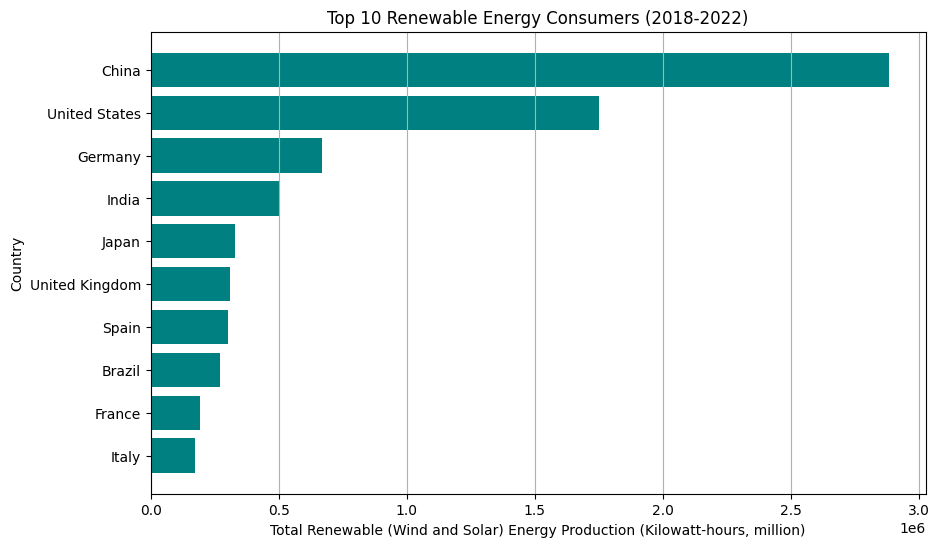

In [ ]:
top_10_renewable = total_renewable_sorted.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_renewable['Country or Area'], top_10_renewable['Quantity'], color='teal')
plt.xlabel('Total Renewable (Wind and Solar) Energy Production (Kilowatt-hours, million)')
plt.ylabel('Country')
plt.title('Top 10 Renewable Energy Consumers (2018-2022)')
plt.gca().invert_yaxis()  # To display the highest producer at the top
plt.grid(axis='x')
plt.show()

In [ ]:
total_capacity_data = pd.read_csv('total_capacity.csv')
total_capacity_data.head()

,Country or Area,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes
0,Afghanistan,Electricity - total net installed capacity of ...,2022.0,"Kilowatts, thousand",662.0,1.0
1,Afghanistan,Electricity - total net installed capacity of ...,2021.0,"Kilowatts, thousand",558.0,1.0
2,Afghanistan,Electricity - total net installed capacity of ...,2020.0,"Kilowatts, thousand",550.0,1.0
3,Afghanistan,Electricity - total net installed capacity of ...,2019.0,"Kilowatts, thousand",550.0,1.0
4,Afghanistan,Electricity - total net installed capacity of ...,2018.0,"Kilowatts, thousand",540.7,1.0


In [ ]:
# Filter for the most recent year of data available for each country to get a current snapshot
most_recent_year = total_capacity_data.groupby('Country or Area')['Year'].transform(max) == total_capacity_data['Year']
total_capacity_recent = total_capacity_data[most_recent_year]

# Calculate the total installed capacity for each country
total_installed_capacity = total_capacity_recent.groupby('Country or Area')['Quantity'].sum().reset_index(name='Total Installed Capacity')

# Calculate installed capacity from wind and solar for each country
wind_solar_filter = total_capacity_recent['Commodity - Transaction'].str.contains('wind|solar', case=False, regex=True)
wind_solar_capacity = total_capacity_recent[wind_solar_filter].groupby('Country or Area')['Quantity'].sum().reset_index(name='Wind and Solar Capacity')

# Merge the total and wind/solar capacities
merged_data = pd.merge(total_installed_capacity, wind_solar_capacity, on='Country or Area', how='left').fillna(0)

# Calculate the percentage of wind and solar in the total installed capacity
merged_data['Wind and Solar Percentage'] = (merged_data['Wind and Solar Capacity'] / merged_data['Total Installed Capacity']) * 100

# Sort countries by the highest percentage of wind and solar in their energy mix
sorted_data = merged_data.sort_values(by='Wind and Solar Percentage', ascending=False).reset_index(drop=True)

sorted_data.head(10)


,Country or Area,Total Installed Capacity,Wind and Solar Capacity,Wind and Solar Percentage
0,Sri Lanka,3865.020,1932.510,50.000000
1,Algeria,2397.200,940.800,39.245787
2,Liechtenstein,132.000,42.000,31.818182
3,Denmark,66005.064,17449.762,26.437005
4,State of Palestine,1352.000,356.000,26.331361
5,Viet Nam,179841.960,46206.980,25.693103
6,Germany,979128.000,246412.000,25.166475
7,Netherlands (Kingd. of the),189006.616,45360.102,23.999214
8,Tuvalu,22.136,5.268,23.798338
9,Tonga,131.280,30.240,23.034735


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the relevant columns for clustering
features = merged_data[['Total Installed Capacity', 'Wind and Solar Capacity']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply KMeans clustering
# Assuming an initial choice of 3 clusters for demonstration purposes
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(features_scaled)

# Add the cluster labels to the dataframe
merged_data['Cluster'] = kmeans.labels_

# Display the first few rows of the dataframe with cluster labels
merged_data.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Country or Area,Total Installed Capacity,Wind and Solar Capacity,Wind and Solar Percentage,Cluster
0,Afghanistan,2648.0,66.0,2.492447,9
1,Albania,11012.0,246.0,2.233927,9
2,Algeria,2397.2,940.8,39.245787,9
3,American Samoa,200.8,10.4,5.179283,9
4,Andorra,216.0,2.6,1.203704,9


In [ ]:
# Correcting the approach to annotate country names on the scatter plot with 10 clusters
# Apply KMeans clustering with 10 clusters
kmeans_10 = KMeans(n_clusters=10, random_state=0)
kmeans_10.fit(features_scaled)

# Add the new cluster labels to the dataframe
merged_data['Cluster_10'] = kmeans_10.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Appendix B1

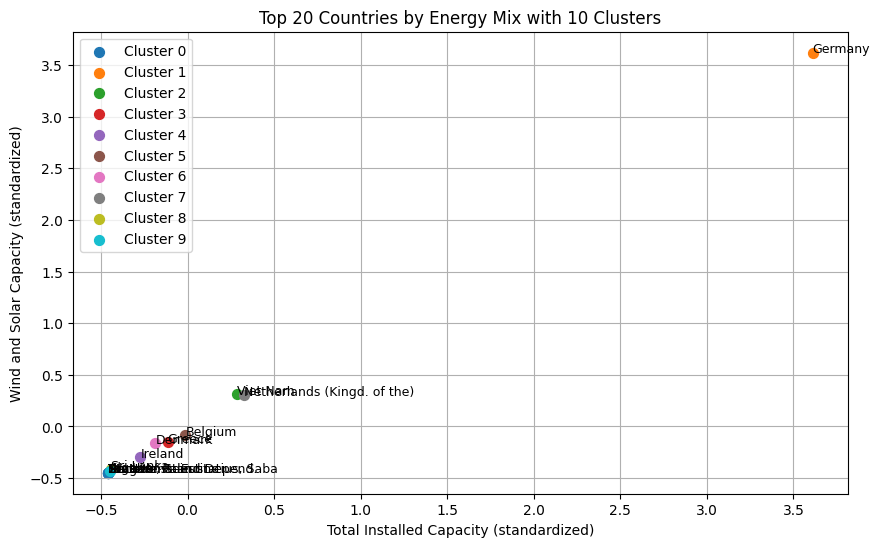

In [ ]:
# Correcting the error for the plot with the top 20 countries using 10 clusters
# Assuming 'features_top_20_scaled' and 'kmeans_top_20' have been correctly defined and executed

# Define a colormap for 10 clusters
colors = plt.cm.tab10(np.linspace(0, 1, 10))

# Create the plot
plt.figure(figsize=(10, 6))

for i in range(10):  # Loop over the clusters
    # Get the data points belonging to cluster i
    cluster_data = features_top_20_scaled[top_20_countries['Cluster'] == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=50, color=colors[i], label=f'Cluster {i}')

    # Annotate country names for each data point
    countries_in_cluster = top_20_countries[top_20_countries['Cluster'] == i]['Country or Area'].values
    for j, country_name in enumerate(countries_in_cluster):
        if j < len(cluster_data):
            plt.text(cluster_data[j, 0], cluster_data[j, 1], country_name, fontsize=9)

plt.title('Top 20 Countries by Energy Mix with 10 Clusters')
plt.xlabel('Total Installed Capacity (standardized)')
plt.ylabel('Wind and Solar Capacity (standardized)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Reload the dataset in case it has been updated or to ensure the correct dataset is loaded

total_capacity_data_updated = pd.read_csv('total_capacity.csv')

# Filter for the UK data from 2018 to 2022
uk_data_updated = total_capacity_data_updated[(total_capacity_data_updated['Country or Area'] == 'United Kingdom') & (total_capacity_data_updated['Year'] >= 2018) & (total_capacity_data_updated['Year'] <= 2022)]

# Group by Year and Commodity - Transaction to observe changes over this period
uk_trends_updated = uk_data_updated.groupby(['Year', 'Commodity - Transaction'])['Quantity'].sum().unstack(fill_value=0)

# Calculate the year-on-year change for each category within 2018-2022 to identify substantial changes
uk_trends_change_updated = uk_trends_updated.diff().dropna()

uk_trends_change_updated


Commodity - Transaction,Electricity - net installed capacity of electric power plants public solar,"Electricity - net installed capacity of electric power plants, public combustible fuels","Electricity - net installed capacity of electric power plants, public hydro","Electricity - net installed capacity of electric power plants, public nuclear","Electricity - net installed capacity of electric power plants, public wind","Electricity - net installed capacity of electric power plants, self-producer combustible fuels","Electricity - net installed capacity of electric power plants, self-producer hydro","Electricity - net installed capacity of electric power plants, self-producer solar","Electricity - net installed capacity of electric power plants, self-producer tide, wave, marine","Electricity - net installed capacity of electric power plants, self-producer wind",...,"Electricity - total net installed capacity of electric power plants, combustible fuels","Electricity - total net installed capacity of electric power plants, hydro","Electricity - total net installed capacity of electric power plants, main activity","Electricity - total net installed capacity of electric power plants, main activity & autoproducer","Electricity - total net installed capacity of electric power plants, nuclear","Electricity - total net installed capacity of electric power plants, solar","Electricity - total net installed capacity of electric power plants, tide, wave, marine","Electricity - total net installed capacity of electric power plants, wind",Electricity generating capacity - Pumped hydro - Main activity producers,Electricity generating capacity - Pumped hydro - Total
Year,,,,,,,,,,,,,,,,,,,,,
2019.0,396.0,-6596.998,-0.323,0.0,2356.151,725.511,3.183,-110.2,1.898,-74.871,...,-5871.487,2.86,-3845.170,-3299.649,0.0,285.8,1.898,2281.28,0.0,0.0
2020.0,431.0,-1133.000,-2.624,0.0,763.300,-156.478,8.914,-196.8,0.000,-192.600,...,-1289.478,6.29,58.676,-478.288,0.0,234.2,0.000,570.70,0.0,0.0
2021.0,167.0,-112.126,0.730,-1120.0,1140.800,104.586,4.440,219.0,0.000,149.500,...,-7.540,5.17,76.404,553.930,-1120.0,386.0,0.000,1290.30,0.0,0.0


# Appenix A2

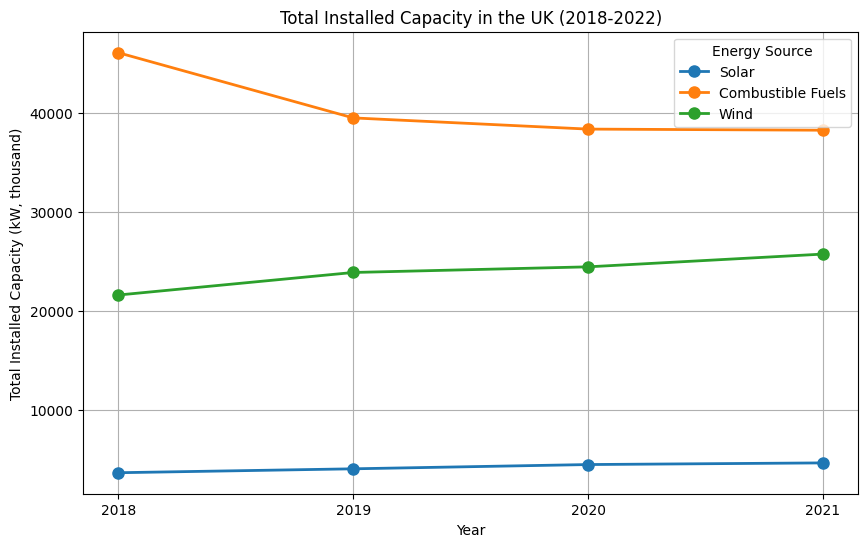

In [ ]:
# Since the detailed changes for each year were not visible due to display limitations, let's try plotting the total installed capacity (not just the changes) for these categories from 2018 to 2022 for a clearer overall trend.

# Re-calculating to include all years for the total capacity
uk_total_capacity_trend = uk_data_updated.pivot(index='Year', columns='Commodity - Transaction', values='Quantity')

# Filtering for the relevant categories
uk_total_capacity_trend_filtered = uk_total_capacity_trend[[
    'Electricity - net installed capacity of electric power plants public solar',
    'Electricity - net installed capacity of electric power plants, public combustible fuels',
    'Electricity - total net installed capacity of electric power plants, wind'
]]

# Simplifying the labels for clarity in the plot
labels_simplified = ['Solar', 'Combustible Fuels', 'Wind']

plt.figure(figsize=(10, 6))

for category, label in zip(uk_total_capacity_trend_filtered.columns, labels_simplified):
    plt.plot(uk_total_capacity_trend_filtered.index, uk_total_capacity_trend_filtered[category], marker='o', linestyle='-', linewidth=2, markersize=8, label=label)

plt.title('Total Installed Capacity in the UK (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Total Installed Capacity (kW, thousand)')
plt.legend(title='Energy Source')
plt.grid(True)
plt.xticks(uk_total_capacity_trend_filtered.index)
plt.show()


# Appendix A4

In [ ]:
# Load the newly uploaded total capacity dataset for analysis

total_capacity_full_data = pd.read_csv('total_capacity_full.csv')

# Preliminary analysis to identify outliers, nulls, large variance, and potential biases

# Check for null values
null_counts = total_capacity_full_data.isnull().sum()

# Describe the dataset to understand variance and potential outliers
description = total_capacity_full_data.describe()

# Check for biases across regions by analyzing the distribution of data entries per region
region_distribution = total_capacity_full_data['Country or Area'].value_counts()

null_counts, description, region_distribution.head()


(Country or Area                0
 Commodity - Transaction        0
 Year                           2
 Unit                           2
 Quantity                       2
 Quantity Footnotes         54273
 dtype: int64,
                Year      Quantity  Quantity Footnotes
 count  71274.000000  7.127400e+04             17003.0
 mean    2007.181314  8.571122e+03                 1.0
 std        9.268187  5.604089e+04                 0.0
 min     1990.000000  0.000000e+00                 1.0
 25%     1999.000000  2.900000e+01                 1.0
 50%     2008.000000  2.830000e+02                 1.0
 75%     2015.000000  2.581000e+03                 1.0
 max     2022.000000  2.424060e+06                 1.0,
 United States    851
 Japan            754
 France           750
 Spain            722
 Germany          716
 Name: Country or Area, dtype: int64)